<Figure size 1000x500 with 0 Axes>

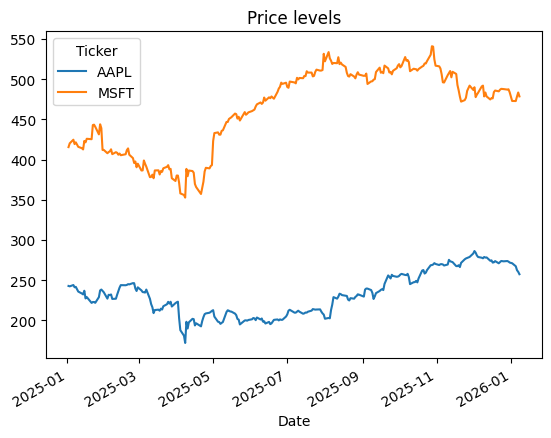

<Figure size 1000x500 with 0 Axes>

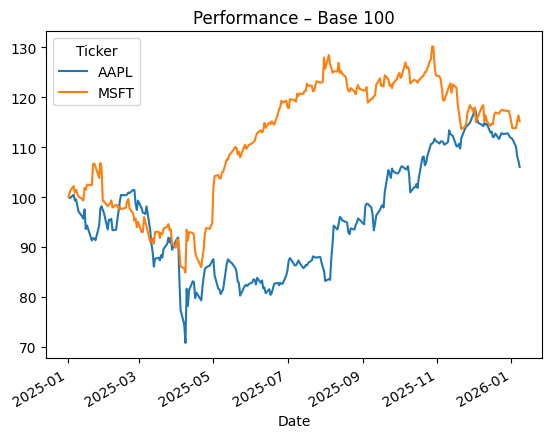

C:\Users\ilyes\AppData\Local\Temp\ipykernel_12620\649913530.py:66: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


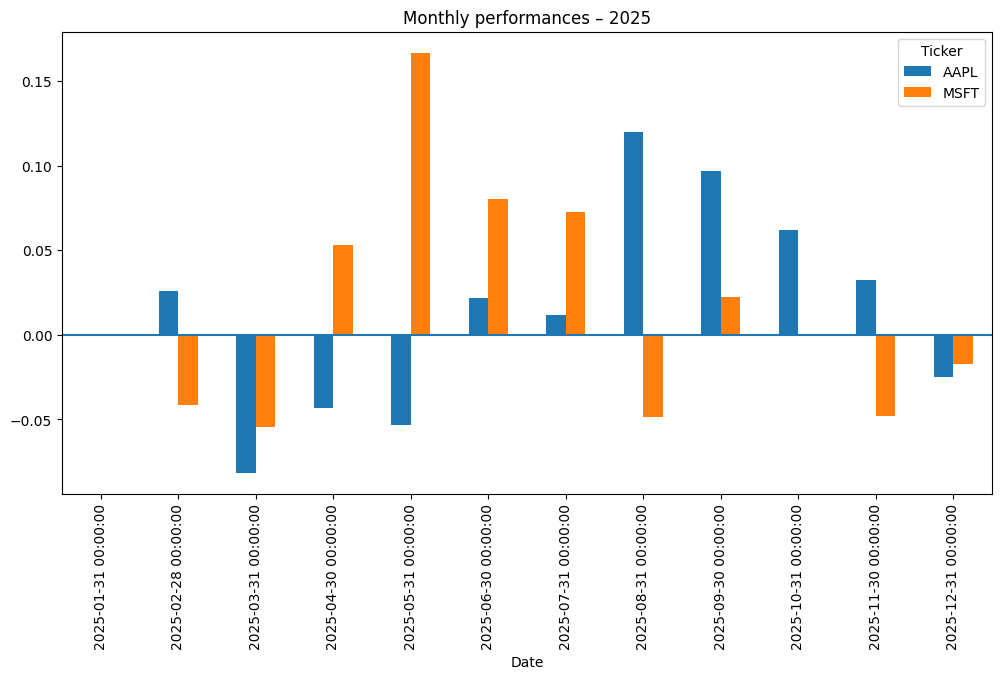


=== PERFORMANCE INDICATORS ===
        Total return  Annualized return  Volatility      1M      3M      1Y
Ticker                                                                     
AAPL          0.0602             0.1154      0.3226 -0.0715  0.0141  0.0674
MSFT          0.1519             0.1843      0.2423 -0.0272 -0.0821  0.1416


In [ ]:
# ============================================================
# ADAPTABLE PERFORMANCE ANALYSIS TOOL
# ============================================================

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) USER PARAMETERS
# ------------------------------------------------------------
TICKERS = ["AAPL", "MSFT"]   # user input
START_DATE = "2025-01-01"
END_DATE = None              # None = today
BASE = 100                   # base 100
REFERENCE = None             # e.g. "AAPL" for relative perf
CALENDAR_YEAR = 2025         # year for monthly histogram

# ------------------------------------------------------------
# 2) DOWNLOAD DATA
# ------------------------------------------------------------
prices = yf.download(
    TICKERS,
    start=START_DATE,
    end=END_DATE,
    auto_adjust=True,
    progress=False
)["Close"]

prices = prices.sort_index().ffill()

# ------------------------------------------------------------
# 3) PRICE CHART
# ------------------------------------------------------------
plt.figure(figsize=(10, 5))
prices.plot(title="Price levels")
plt.show()

# ------------------------------------------------------------
# 4) PERFORMANCE – BASE 100
# ------------------------------------------------------------
perf_base = prices / prices.iloc[0] * BASE

plt.figure(figsize=(10, 5))
perf_base.plot(title=f"Performance – Base {BASE}")
plt.show()

# ------------------------------------------------------------
# 5) RELATIVE PERFORMANCE (optional)
# ------------------------------------------------------------
if REFERENCE is not None and REFERENCE in prices.columns:
    relative_perf = prices.div(prices[REFERENCE], axis=0) - 1

    plt.figure(figsize=(10, 5))
    relative_perf.plot(title=f"Relative performance vs {REFERENCE}")
    plt.axhline(0)
    plt.show()

# ------------------------------------------------------------
# 6) MONTHLY CALENDAR PERFORMANCE (HISTOGRAM)
# ------------------------------------------------------------
prices_year = prices.loc[f"{CALENDAR_YEAR}-01-01":f"{CALENDAR_YEAR}-12-31"]

monthly_returns = (
    prices_year
    .resample("M")
    .last()
    .pct_change()
)

monthly_returns.plot(
    kind="bar",
    figsize=(12, 6),
    title=f"Monthly performances – {CALENDAR_YEAR}"
)
plt.axhline(0)
plt.show()

# ------------------------------------------------------------
# 7) SUMMARY INDICATORS
# ------------------------------------------------------------
returns = prices.pct_change()

first_prices = prices.apply(lambda x: x.dropna().iloc[0])
last_prices = prices.apply(lambda x: x.dropna().iloc[-1])

indicators = pd.DataFrame(index=prices.columns)

indicators["Total return"] = last_prices / first_prices - 1
indicators["Annualized return"] = (1 + returns.mean()) ** 252 - 1
indicators["Volatility"] = returns.std() * (252 ** 0.5)
indicators["1M"] = prices.iloc[-1] / prices.iloc[-21] - 1
indicators["3M"] = prices.iloc[-1] / prices.iloc[-63] - 1
indicators["1Y"] = prices.iloc[-1] / prices.iloc[-252] - 1

print("\n=== PERFORMANCE INDICATORS ===")
print(indicators.round(4))